#**Exercise Transfer Learning**

### **Table of contents:**

###  **Transfer learning for configurations control**
* ###  1. Introduction
* ###  2. Libraries
* ###  3. Data preparation and import
* ###  4. The pre-trained base model
* ###  5. Model training
* ###  6. Further application

###  **Transfer Learning for tool wear assesment - supplemental task**
* ###  1. Introduction
* ###  2. Transfer learning


# **Transfer learning for configuration control**

# **1. Introduction**





#### **1.1 Motivation**

Transfer Learning is a research problem in Machine Learning that focuses on using a pre-trained neural network for new application. Transfer learning (TL) is especially common in image classification since for TL much less data than usual is sufficient and therefore TF saves time and resources.

Our use case is an assembly of miniature trucks, which are to be assembled according to the customer's requirements. These differ, on the one hand, in their type (truck with loader, truck with small container, truck with big container) and, on the other, hand with regard to the color of the components. Before the trucks can be delivered to the customer, they must be checked regarding the proper configuration.

To reduce the complexity, we will only consider six different configurations in the following. The different classes are shown below:

The categories mentioned were determined according to the following criteria:	

*   container_big_tractor_b: Truck with blue tractor and loaded with one big red container
*   container_big_tractor_y: Truck with yellow tractor and loaded with one big red container
*   container_small_gy: Truck loaded with little containers in green and yellow
*   container_small_b: Truck loaded with little container in blue
*   loader_tractor_r: Truck with red tractor and loaded with loader
*   loader_tractor_y: Truck with yellow tractor and loaded with loader



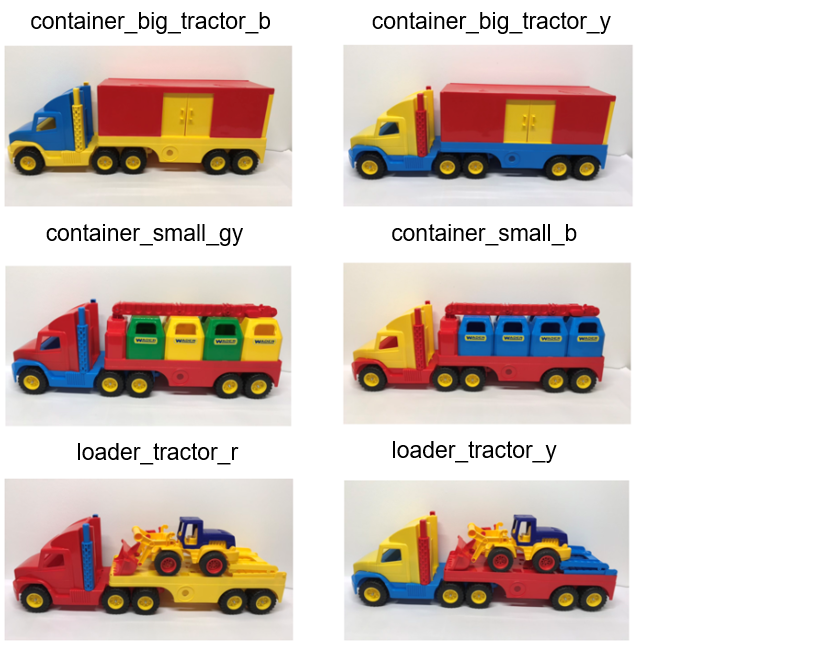



#### **1.2 Deliverables**
For completing this exercise successfully, you need to deliver certain results. Throughout the notebook you will find **questions** you need to answer, and coding **tasks** where you need to modify existing code or fill in blanks. Answers to the questions need to be added in the prepared *Your answer* markdown fields. Coding tasks can be solved by modifying or inserting code in the cells below the task. If needed, you can add extra cells to the notebook, as long as the order of the existing cells remains unchanged. Once you are finished with the lab, you can submit it through the procedure described in the forum. Once the labs are submitted, you will receive feedback regarding the questions. Thus, the **Feedback** boxes need to be left empty.

Example:

>**Question:** What do I do if I am stuck solving this lab?

>**Your answer:** <span style="color:green"> Have a look at the forum, maybe some of your peers already experienced similiar issues. Otherwise start a new discussion to get help!</span>

>**Feedback:** <span style="color:orange">This is a great approach! Besides asking in the forum I'd also suggest asking your tutor.</span>

>**Solution:** <span style="color:black">The correct solution for the question.The solution will be provided after the review process.</span>



#### **1.3 Resources**
If you are having issues while completing this lab, feel free to post your questions into the forum. Your peers as well as our teaching advisors will screen the forum regularly and answer open questions. This way, the information is available for fellow students encountering the same issues.

Note: Here we also want to promote the work with online resources and thus the independent solution of problems. For some tasks you have to search for the appropriate method yourself. For other tasks the already given code must be adapted or just copied.

# **2. Libraries**


Below you can see some libraries that we use in this project.

With _import_ we import the libraries and we can give them an alias with _as_, which is only for simplification.

In [1]:
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt
import torch 
from torch.utils.data import Dataset
import pathlib
from torchsummary import summary
from tqdm import tqdm
from torch.optim import Adam
import torch.nn as nn
from torchvision.transforms import transforms
import os
!pip install torchmetrics
from torchmetrics import ConfusionMatrix

Following we want to check which version we are using.

In [2]:
print("Numpy version: " + np.__version__)
print("PIL.Image version: " + Image.__version__)
print("Matplotlib.pylab version: " + plt.__version__)

Numpy version: 1.21.5
PIL.Image version: 9.2.0
Matplotlib.pylab version: 1.21.5


# **3. Data preparation and import**

The first step is to access the prepared image data set.

Different options can be used to import the data set.
You can either import/upload the data from Google Drive or from your own HDD.
In this Notebook Google Drive is used. 

For this purpose it is necessary to connect your Google Drive to this Notebook. Execute the following cell and folllow the instructions.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## 3.1 Loading the test data

The data set is already split into a **training**, **validation** and  **test** sets.  The class names are derived from the sub folder names.


For a CNN, the images must have the same dimensions. Here we define a variable called **IMAGE_SHAPE**.

In [65]:
IMAGE_SHAPE = (224, 224)

In [66]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_data="./drive/MyDrive/ML4Eng II/ML4Eng_II_Exercises_VHB_final/ML4Eng_II_Exersice_Transfer_Learning/dataset_truck/training"

# If you have added the data set folder to your Google Drive as a short cut as described, there is no need to adjust the path.
# If the link doesn't work, you'll need to adjust it depending on where you have stored the dataset in your Google Drive.
training_image_data  = image_generator.flow_from_directory(training_data,target_size=IMAGE_SHAPE)

In [67]:
# Hyperparameters
BATCH = 32
EPOCH = 5

## 3.2 Loading the validation data

The names of the different classes are printed below.

In [66]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_data="./drive/MyDrive/ML4Eng II/ML4Eng_II_Exercises_VHB_final/ML4Eng_II_Exersice_Transfer_Learning/dataset_truck/validation" 

# If you have added the data set folder to your Google Drive as a short cut as described, there is no need to adjust the path.
# If the link doesn't work, you'll need to adjust it depending on where you located the link to the dataset in your Google Drive.
validation_image_data  = image_generator.flow_from_directory(validation_data,target_size=IMAGE_SHAPE)

# **4. The pre-trained base model**


A pre-trained model is used for Transfer Learning. 
For the use of this model there are two possibilities:


* Feature Extractor: Use of the learned features for your own application.
* Fine Tuning: Re-training of the Base Model for your own application.

In the following, we will use the base model as a feature extractor and create our own classification layer for our application.



## 4.1 Structure and use of the basic model - MobilNetV2

#####BEFORE
Various pre-trained network architectures are already available for download. Often these are pre-trained with the [ImageNet dataset](http://www.image-net.org/).

In this exercise we use the MobileNetV2 model as a pre-trained base model. The model_arch.summary() command can be used to output the architecture of the model to get an overview.

#####AFTER
Various pre-trained network architectures are already available for download. Often these are pre-trained with the [ImageNet dataset](http://www.image-net.org/).

In this exercise we use the MobileNetV2 model as a pre-trained base model. The torchsummary.summary() command can be used to output the architecture of the model to get an overview. It is necessary to give a network and a shape of images as inputs.

>**Question:** Analyze the architecture shown above. What type of neural network is it? Which activation function is used? For how many classes was the network trained?

>**Your answer:** TBD

>**Feedback:**


For more information about MobilNetV2, please visit: [MobilNetV2](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html)


If we want to use a model as a feature extractor, we need to fit it to our own classification task. The classification layer of the pre-trained model must thus be replaced by one of our own.

To simplify this, we load a version of MobilNetV2, which is already prepared for use as a feature extractor - the classification layer is already removed.

In [69]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class_names = training_image_data.get_labels()
print(class_names)

MobileNetV2 = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
summary(MobileNetV2,(3, 224, 224))

['container_small_b' 'loader_tractor_y' 'container_small_gy'
 'loader_tractor_r' 'container_big_tractor_y' 'container_big_tractor_b']


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [70]:
MobileNetV2.classifier[1] = torch.nn.Linear(in_features=MobileNetV2.classifier[1].in_features,
                                            out_features=class_names.size)
MobileNetV2 = MobileNetV2.to(DEVICE)
summary(MobileNetV2,(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

A summary of this basic model is shown below:

The **image_batch** is a tensor of the form (32, 224, 224, 3) . This is a batch of 32 images of the form 224x224x3 (the last dimension refers to color channels RGB). The **label_batch** is a tensor of the form (32,6) , these are the corresponding labels to the 32 images.

In [71]:
for image_batch, label_batch in training_data_loader:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  torch.Size([32, 3, 224, 224])
Label batch shape:  torch.Size([32])


## 4.2 Adding an own classification head

By adding a classification layer the model can be trained for our application.

>**Task:** Use the Keras Sequential function to complete the model. Add a Dense Layer to the pre-trained Base Model (Feature Extractor) for classification. The number of units corresponds to the number of our classes. Use the documenation to find a solution: [Dense layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

>**Feedback:**

In [ ]:
model_truck = tf.keras.Sequential([                          
 feature_extractor, 

#############################
# Please add your code here #
#############################   

###
# Solution
###



###
# END Solution
###  
])

In [ ]:
Following the new architecture of the model is shown.

In [ ]:
model_truck.summary()

>**Question:** Compare the three above printed architectures (complete MobilNetV2, Feature Extractor, Model with new classification head). What do you notice?

>**Your answer:** TBD

>**Feedback:**


# **5. Model training**

### 5.1 Training conditions

>**Task:** In the next step we compile the model. Add the optimizer. Select the Adam optimizer and set the learning rate to 0.001. Use the documentation to find a solution: [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

>**Feedback:**

In [72]:
model_truck.compile(
    
#############################
# Please add your code here #
#############################   

###
# Solution
###



###
# END Solution
###  

 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
 metrics=['acc']
 
)

### 5.2 Training

The following function is used to save the losses after each training step.

Now we can train the network with the given data set.


Remarks:

*   Due to the random initialization of the weights, each new training will produce slightly different result.
*   If the network is not reinitialized, the training will continue with the weights already trained.

>**Task:** Train the network with 5 epochs. Familiarize yourself with the documentation of the used [fit ()](https://www.tensorflow.org/api_docs/python/tf/keras/Model) function.

>**Feedback:**

In [75]:
#############################
# Please add your code here #
#############################   

history = model_truck.fit(training_image_data, 
                          
                      # Please add your code here #
                      
validation_data=validation_image_data, callbacks=[batch_stats_callback])



Epoch(Val) 4: 100%|██████████| 5/5 [00:15<00:00,  3.20s/img, accuracy=68.8, loss=0.00277]


**Loss**: Loss is a measure of how well the algorithm is performing. The lower, the better.

**Accuracy**: It shows how accurate the predictions are. The higher, the better.

>**Question:** What is the difference between model parameters and model hyperparameters? Give an example of a neural network for each of them.

>**Your answer:** TBD

>**Feedback:**


### 5.3 Visualization of the results

Below an illustration of the trajectory of the loss after each training step is shown.


The following two illustrations show the results after each epoch.


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


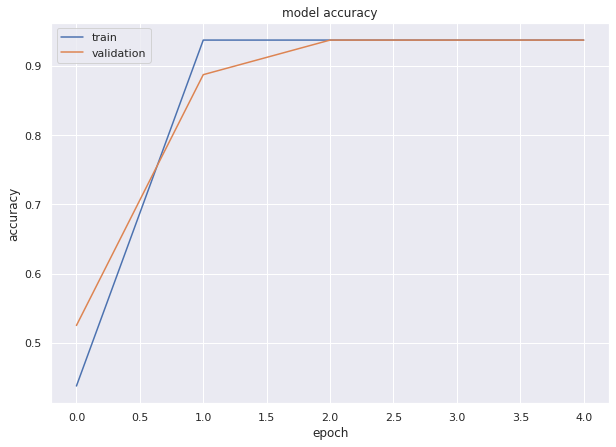

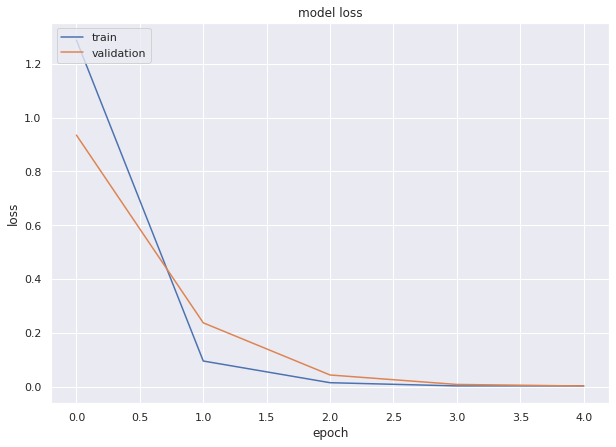

In [76]:
print(history.keys())

# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

>**Question:** Discuss the trajectories of the accuracy as well as of the loss. How do you evaluate the training based on the trajectories?

>**Your answer:** TBD

>**Feedback:**



### 5.4 Visualization of the prediction for some images

We visualizae some sample images of the training dataset.

In addition to the individual images, the score of the individual classes is shown. The class with the highest score is the predicted one.

In [77]:
image_batch, label_batch = iter(training_data_loader).next()
print(image_batch, label_batch)
image_batch_transposed = np.transpose(image_batch, (0,2,3,1))
MobileNetV2.eval()
arr = MobileNetV2(image_batch).detach().cpu().numpy()
predicted_id = np.argmax(arr, axis=-1)
print(predicted_id)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)
true_label_batch = class_names[label_batch]

tensor([[[[0.8902, 0.8902, 0.8941,  ..., 0.8588, 0.8549, 0.8510],
          [0.8902, 0.8902, 0.8941,  ..., 0.8549, 0.8549, 0.8510],
          [0.8863, 0.8902, 0.8902,  ..., 0.8549, 0.8510, 0.8510],
          ...,
          [0.9098, 0.9137, 0.9137,  ..., 0.8902, 0.8902, 0.8902],
          [0.9137, 0.9137, 0.9137,  ..., 0.8863, 0.8863, 0.8902],
          [0.9137, 0.9137, 0.9137,  ..., 0.8863, 0.8863, 0.8902]],

         [[0.8902, 0.8902, 0.8902,  ..., 0.8431, 0.8392, 0.8353],
          [0.8902, 0.8902, 0.8902,  ..., 0.8392, 0.8392, 0.8353],
          [0.8863, 0.8902, 0.8863,  ..., 0.8392, 0.8353, 0.8353],
          ...,
          [0.9020, 0.9059, 0.9059,  ..., 0.8824, 0.8824, 0.8824],
          [0.9059, 0.9059, 0.9059,  ..., 0.8784, 0.8784, 0.8824],
          [0.9059, 0.9059, 0.9059,  ..., 0.8784, 0.8784, 0.8824]],

         [[0.8588, 0.8588, 0.8588,  ..., 0.8392, 0.8353, 0.8314],
          [0.8588, 0.8588, 0.8627,  ..., 0.8353, 0.8353, 0.8314],
          [0.8549, 0.8588, 0.8588,  ..., 0

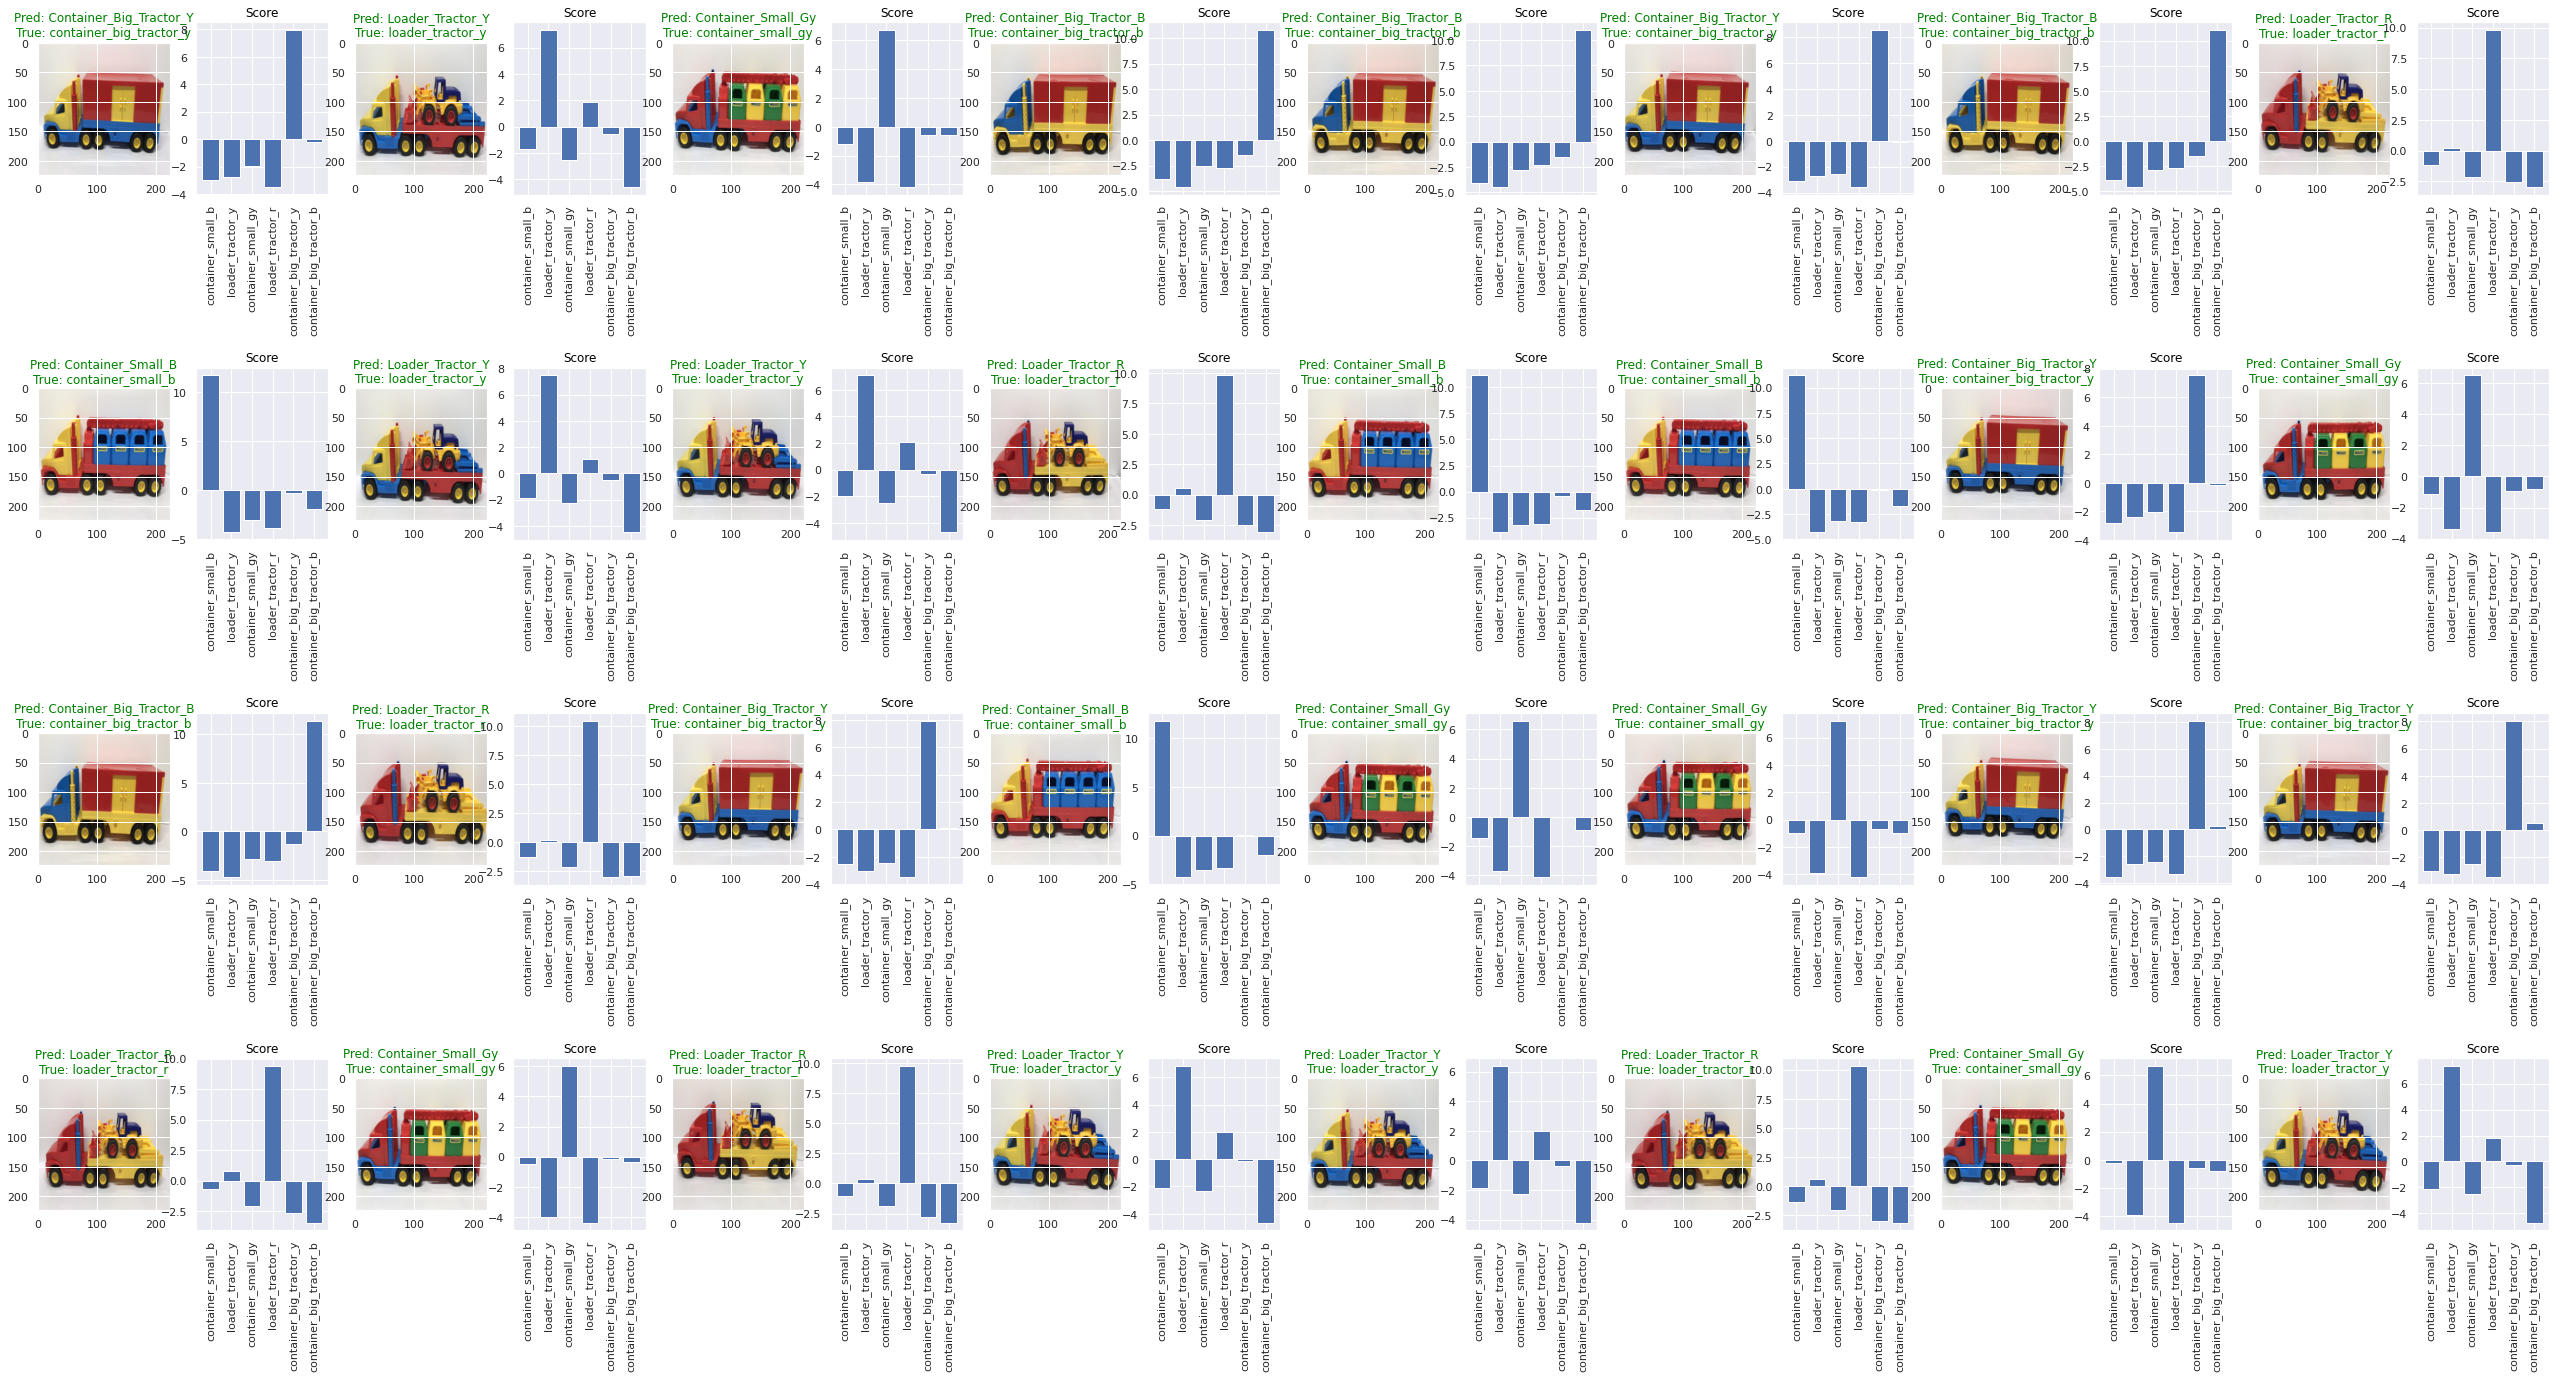

In [78]:
img_counter=0
prob_counter=0

plt.figure(figsize=(45,200))
plt.subplots_adjust(hspace=1)
for n in range(64):
  plt.subplot(32,16,n+1)
  if(n%2==0):
      plt.imshow(image_batch_transposed[img_counter])
      color = "green" if predicted_id[img_counter] == label_batch[img_counter] else "red"
      plt.title("Pred: "+predicted_label_batch[img_counter].title()+"\nTrue: "+true_label_batch[img_counter], color=color)
      img_counter=img_counter+1

  if(n%2==1):
      plt.title("Score", color="Black")

      data=[arr[prob_counter][0],arr[prob_counter][1],arr[prob_counter][2],
            arr[prob_counter][3], arr[prob_counter][4], arr[prob_counter][5]
            ]
    
      plt.bar(class_names,data)
      plt.xticks(rotation='vertical')
      
      prob_counter=prob_counter+1     

>**Question:** Above some example images with their classification are shown. Can you qualitatively recognize patterns concerning the performance of the classification?

>**Your answer:** TBD

>**Feedback:**


## 5.5 Evaluation of the model

Next, the evaluation of the trained model on a separate test data set is conducted. For this purpose, we have to load the test data set.

In [79]:
test_path = "./drive/MyDrive/ML2/dataset_truck/test"
test_image_data = image_dataset(test_path, IMAGE_SHAPE)
test_data_loader = torch.utils.data.DataLoader(test_image_data, batch_size = BATCH)
# all data can not be uploaded bacasue of the RAM capacity, that's why the data were splited in batch size(32)

In [80]:
for image_batch, label_batch in test_data_loader:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  torch.Size([32, 3, 224, 224])
Label batch shape:  torch.Size([32])


Subsequently, we apply the trained network to the images of the test dataset.

In [81]:
predicted_batch, target_labels = predict(test_data_loader, MobileNetV2)

Test: 100%|██████████| 5/5 [00:10<00:00,  2.16s/img]


A frequently used way to visualize the result of a classification is the Confusion Matrix. Below you can see an exemplified Confusion Matrix for a 2-class classification problem with the formulas of precision (PR), recall (RE), accuracy (CA), and F 1-measure. 

Source metrics Confusion Matrix: [Understanding the metrics](https://lmy.de/n7epT)

For further informations: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) 

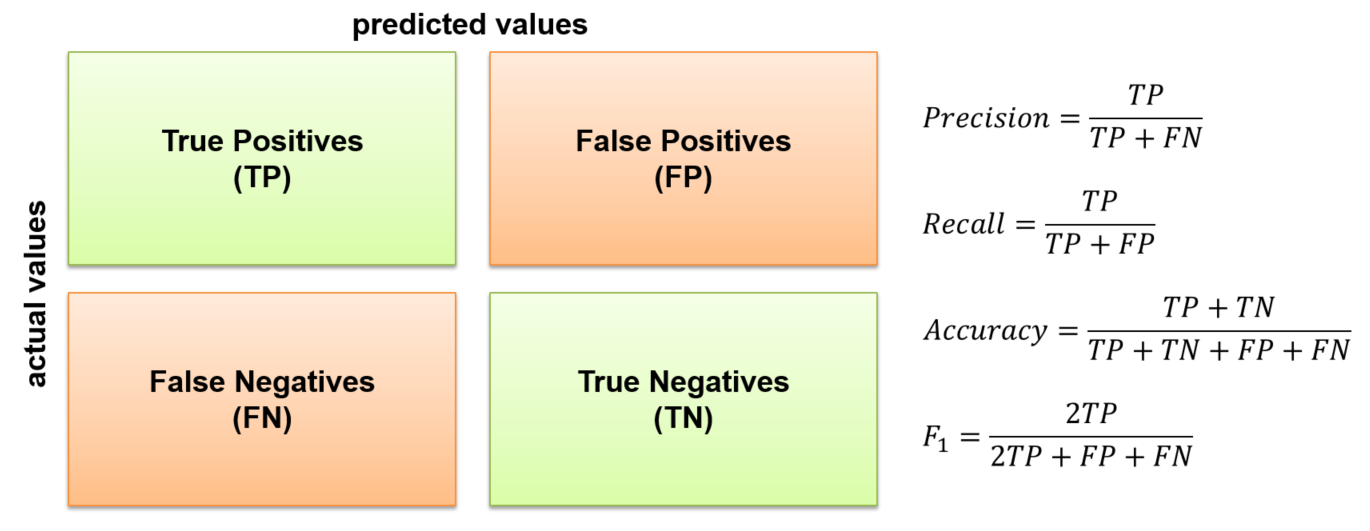

Binary classification problems often focus on a positive class which we want to detect. In contrast, in a typical multi-class classification problem, we need to categorize each sample into 1 of N different classes, which is the case in this exercise. Our classifier needs to predict which type of truck is shown in each photo. This is a classification problem with N = 6.

An exemplified confusion matrix for multi-class classification is shown below:

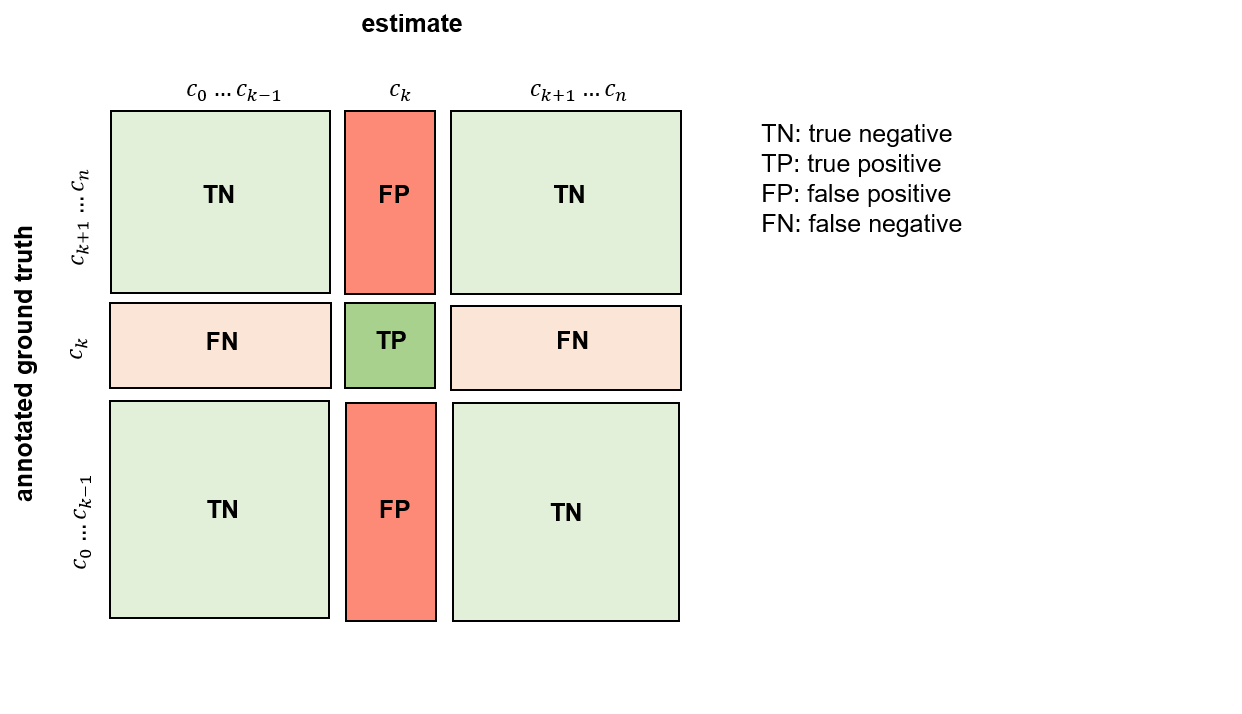

>**Question:** In our use case we have multi-class problem. How can we calculate the precision, recall and f1 for a multiclass problem? What are the three main options here? Give the formula for each of the three options. 

>**Your answer:** TBD

>**Feedback:**



The results of our network are presented in the form of a Confusion Matrix.

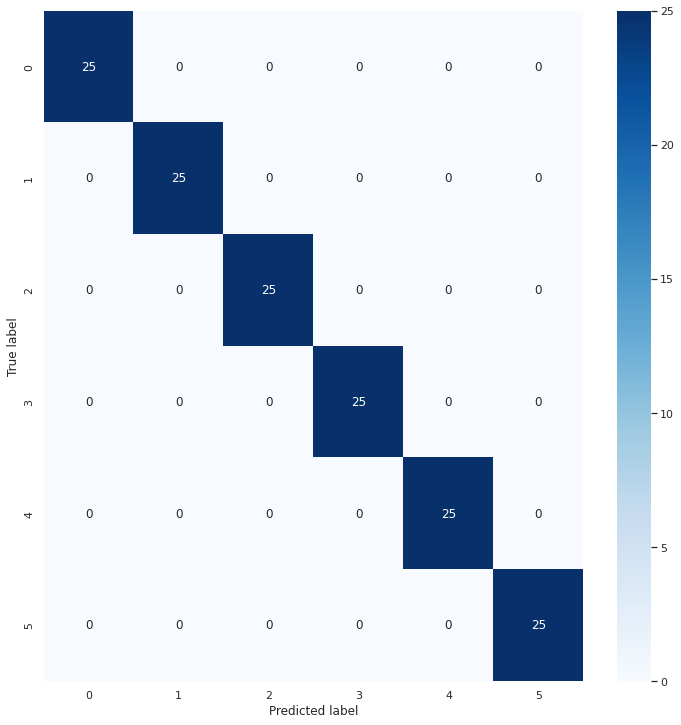

In [82]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
con_mat_df = confmat(torch.tensor(predicted_batch), torch.tensor(target_labels))

figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Based on the classification results, we can calculate the different metrics as explained above. First, we start with the accuracy.

In [83]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(target_labels,  predicted_batch)
print('Accuracy score:', Accuracy)

Accuracy score: 1.0


>**Task:** Calcualte the F1 and Precision score as well. Use the macro average. To do this, use sklearn's documentation for the metric in question: [sklearn classification metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

>**Feedback:**

In [84]:
#############################
# Please add your code here #
#############################   


###
# END Solution
###  

F1 score macro: 1.0
Recall score macro: 1.0
Precision score macro: 1.0


# **6. Further application**

>**Question:** In our example, we have considered only six possible classes so far. In the real application, however, all possible configurations would have to be recognized. With three different basic types and three different colors for each component, the possible configurations are as follows:
>
>*   Loader: tractor unit (3x3x3) x trailer(3) x load (3) = 243
>
>*   Big container: tractor unit (3x3x3) x trailer(3) x load (3) = 243
>
>*   Small container: tractor unit (3x3x3) x trailer(3) x load (3x3x3x3) = 19,683
>
>*   In total 20,169 different configurations would be possible.
>
>To solve this problem with one model, we would need over 20,000 classes. What are the problems with this approach? Do you have an idea for an better approach? 

>**Your answer:** TBD

>**Feedback:**


# **Transfer learning for tool wear assesment - supplemental task**

# **1. Introduction**

In a machining process, the condition-based replacement of the tool is relevant for several reasons.  On the one hand, the tool life potential can be exploited. On the other hand, the product quality is ensured, which could suffer if a worn tool is used. By recognizing the condition of the tool, a condition-based change can be carried out. In the following, the wear status of a cutting tool is to be evaluated using image recordings.
We have already defined three classes, which represent a wear category:

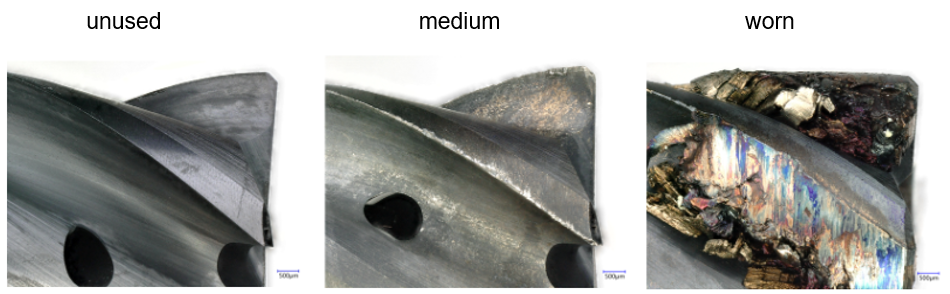

The categories mentioned above were determined according to the following criteria.	

*   **Unused:** not yet used
*   **Medium:** slight signs of use
*   **Worn:** heavy signs of use

The classification was made qualitatively and differs from the wear determination or quantification (e.g. wear mark width).

The data set is already split into a **training**, **validation** and  **test** set.  The class names are derived from the sub folder names.


# **2. Transfer learning**

>**Task:** Create a transfer learning application for the classification of wear. Please use another base model as above. You can use the code for the truck classification as orientation. The goal is to achieve a classification accuracy of 97 % on the test data set.
>
>Note: There are several pre-trained models that you can use as a base model. You can check them out using the link below: https://tfhub.dev/ (Note: You can use the filter option on the left side to search for suitable model.)

>**Feedback:**